# Pysolar

For the longest time I have wanted to explore the [Pysolar](https://github.com/pingswept/pysolar) package in python. It is a pretty great package that generates the azimuth and altitude of the sun based on a location and date/time (At its core, it does more as well). The image from the webpage explains it the best:

![azi](https://pysolar.readthedocs.io/en/latest/_images/reference_frame.png)  
Source: (https://pysolar.readthedocs.io/en/latest/)

It is a really great package, and doesnt need many inputs to get going. You can do alot more with it than just azimuth and latitude, but I will look at that later. I am goign to use four packages and python 3 (Pysolar no longer supports 2). The packages are:

In [66]:
import pysolar as ps
import datetime # to generate datetime objects
import pytz # generate a timezone object
import matplotlib.pyplot as plt # performing plots

The pysolar is pretty straight forward, and I will use mostly the altitude and azimuth functions. The functions which return the altitude of the sun, and the azumith with respect to north take three paramters:
- Latitude;
- Longitude; and
- Date and Time  

The latitude and longitude are pretty easy to generate using google maps (thought I am sure that there is some cleaver python package that can generate those from your address).My current location is in Chestermere Alberta, a small city located to the east of Calgary. The coordinates of my local dog park are taken from google maps:

In [67]:
lat_me = 51.0574094,
long_me = -113.8238714

The date and time can be a bit tricky I have found. This is because you need to specify the correct timezone for your location. I am assuming this is because the math is based from a UTC time, and then is corrected for the time offset. I did something similar to this once in a renewable energy class. Iam pretty sure we did the same calculation as pysolar does here!!

We can create a date and time by using the datetime library and inputting the following: 

In [68]:
mst = pytz.timezone('Canada/Mountain')
date = datetime.datetime(2019, 7, 15,12,0,0,0,mst)

Note that we have specified the timezone using the pytz library. This is a datetime object for July 15, 2019 at 12:00 MST.

In [69]:
print(ps.solar.get_altitude(lat_me, long_me, date))
print(ps.solar.get_azimuth(lat_me, long_me, date))

[60.38700076]
[176.58495117]


Note the strange warning for leap seconds for after 2019!

Now we can start doing some interesting things. One item I have wanted to create for a long time is [analemma](https://en.wikipedia.org/wiki/Analemma). This is when you take the position of the sun at everyday, at the same time over a year or so. Taken from the wiki page here is a great example:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Analemma_fishburn.tif/lossy-page1-800px-Analemma_fishburn.tif.jpg" alt="Analemma" title="Wikipedia" width = "300" align="middle"/>

We can generate an example of one of theses, by looping through all the months of the year at a specific time:

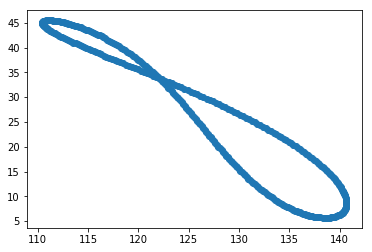

In [70]:
azi = []
alti = []
ana_date = datetime.datetime(2019,1,1,9,0,0,0,mst) # First date of the year

for month in range(0,364):
    ana_date = ana_date + datetime.timedelta(days=1) # increment by a single day
    altitude = ps.solar.get_altitude(lat_me, long_me, ana_date)
    azimuth = ps.solar.get_azimuth(lat_me, long_me, ana_date)
    azi.append(azimuth)
    alti.append(altitude)
    
plt.scatter(azi, alti)

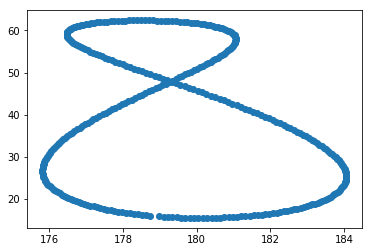

In [71]:
azi = []
alti = []
ana_date = datetime.datetime(2019,1,1,12,0,0,0,mst) # First date of the year

for day in range(0,364):
    ana_date = ana_date + datetime.timedelta(days=1) # increment by a single day
    altitude = ps.solar.get_altitude(lat_me, long_me, ana_date)
    azimuth = ps.solar.get_azimuth(lat_me, long_me, ana_date)
    azi.append(azimuth)
    alti.append(altitude)
    
plt.scatter(azi, alti)

We can look at the curve of the sun over a day, by selecting a day and iterating over the hours

In [72]:
azi = []
alti = []

for hour in range(24):
    date_time = datetime.datetime(2019, 9, 15,hour,0,0,0,mst)
    altitude = ps.solar.get_altitude(lat_me, long_me, date_time)
    azimuth = ps.solar.get_azimuth(lat_me, long_me, date_time)
    azi.append(azimuth)
    alti.append(altitude)


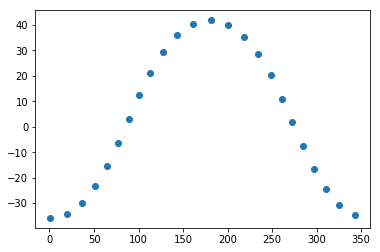

In [73]:
plt.scatter(azi, alti)

Based on this, on september 15 the sun peak at about 42 degrees. Intuitively I though this would be higher.Notice that there are negative numbers for the altitude. This makes sense as the sun is behind the earth during the nighttime hours!!! 

To fix this, we can get a bit more specific with the plotting:

(0, 45)

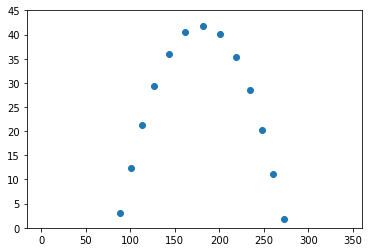

In [74]:
fig, ax = plt.subplots()
ax.scatter(azi, alti)
ax.set_ylim([0,45])

Finally we can combine the two items to create an analemma for every hour throughout the year. I would love to see someone do this with photography, if it is possible. Potentially an panaramic image that spans from east to west, every hour on the hour for every day.

In [75]:
azi = []
alti = []

for hour in range (0,23,1):
    ana_date = datetime.datetime(2019,1,1,hour,0,0,0,mst) # First date of the year, at hour 0
    for day in range(0,365):
        ana_date = ana_date + datetime.timedelta(days=1) # increment by a single day
        altitude = ps.solar.get_altitude(lat_me, long_me,ana_date)
        azimuth = ps.solar.get_azimuth(lat_me, long_me, ana_date)
        azi.append(azimuth)
        alti.append(altitude)


(0, 70)

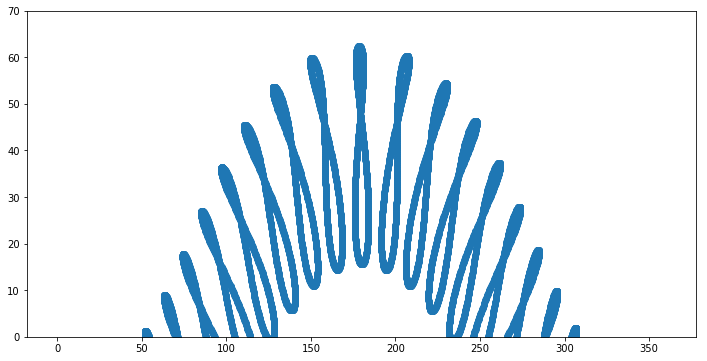

In [76]:
fig, ax = plt.subplots(figsize = (12,6))
ax.scatter(azi, alti)
ax.set_ylim([0,70])

Thats it for now on the begining use of this great library. Next time I look into it, I want to get the solar radiation values for a specific location. I have looked into the docs and there are some really interesting functions for radiation values.